In [175]:
#decision tree

In [176]:
#data preperation

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
import warnings
warnings.filterwarnings('ignore')

In [178]:
df=pd.read_excel("heart_disease.xlsx",sheet_name='Heart_disease')

In [179]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [180]:
df.shape

(908, 13)

In [181]:
df['num'].unique()

array([0, 1, 2, 3, 4])

In [182]:
#exploratory data analysis

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [184]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [185]:
#checking missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [186]:
df.isnull().sum().sum()/len(df)*100

np.float64(6.828193832599119)

In [187]:
#we cannot drop column due to it is more than 5%

In [188]:
df.fillna({'oldpeak':df.oldpeak.mean()},inplace=True)

In [189]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [190]:
#cheking duplicates
df.duplicated().sum()

np.int64(1)

In [191]:
df.drop_duplicates(inplace=True)

In [192]:
df.duplicated().sum()

np.int64(0)

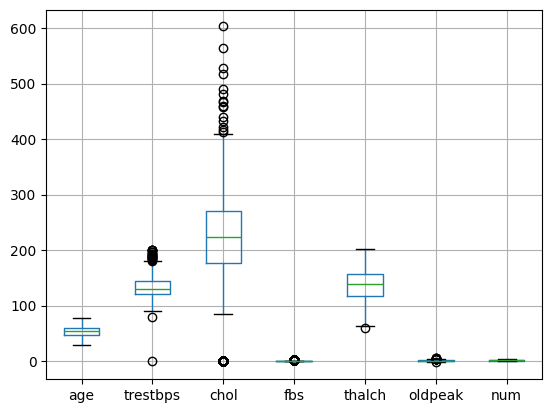

In [193]:
# Checking outliers
df.boxplot()
plt.show()

In [194]:
#outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)


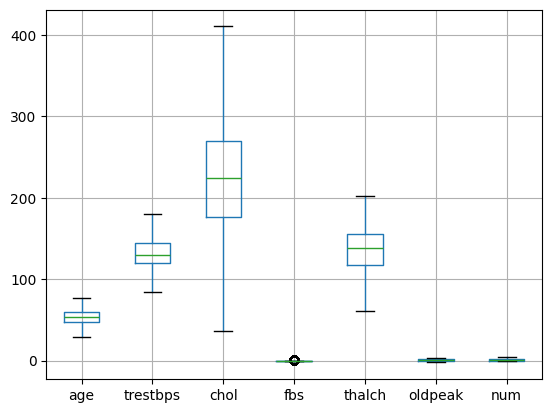

In [195]:
df.boxplot()
plt.show()

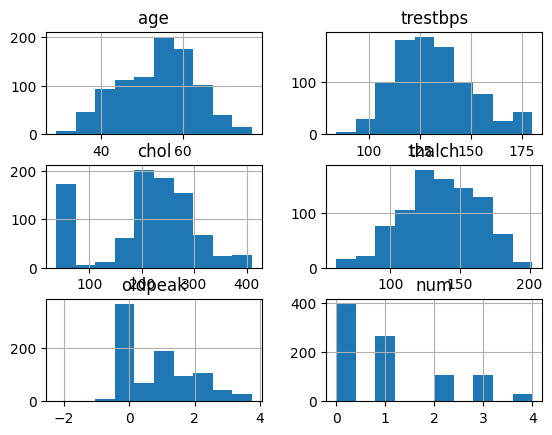

<Figure size 640x480 with 0 Axes>

In [196]:
df.hist()
plt.show()
plt.tight_layout()

In [197]:
#feature engineering

In [198]:
target=df[['num']]
features=df.drop(columns=['num'])

In [199]:
target.head()

,num
0,0
1,0
2,0
3,0
4,0


In [200]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135.0,203.0,False,normal,132.0,False,0.0,flat,fixed defect
2,57,Male,asymptomatic,140.0,192.0,False,normal,148.0,False,0.4,flat,fixed defect
3,52,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,False,0.0,flat,fixed defect
4,57,Male,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,fixed defect


In [201]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,float64
chol,float64
fbs,bool
restecg,object
thalch,float64
exang,object
oldpeak,float64


In [202]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [203]:
#labelling

In [204]:
ord_enc=OrdinalEncoder()

In [205]:
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','thal']

In [206]:
features[categorical_cols] = features[categorical_cols].astype(str)
features[categorical_cols] = ord_enc.fit_transform(features[categorical_cols])

In [207]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,1.0,2.3,0.0,0.0
1,41,1.0,1.0,135.0,203.0,0.0,1.0,132.0,1.0,0.0,1.0,0.0
2,57,1.0,0.0,140.0,192.0,0.0,1.0,148.0,1.0,0.4,1.0,0.0
3,52,1.0,3.0,118.0,186.0,0.0,0.0,190.0,1.0,0.0,1.0,0.0
4,57,1.0,0.0,110.0,201.0,0.0,1.0,126.0,3.0,1.5,1.0,0.0


In [208]:
#scaling

In [209]:
std_sca=StandardScaler()

In [210]:
features[['age','trestbps','chol','thalch','oldpeak']]=std_sca.fit_transform(features[['age','trestbps','chol','thalch','oldpeak']])

In [211]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006097,1.0,3.0,0.608289,0.265386,1.0,0.0,0.523305,1.0,1.389942,0.0,0.0
1,-1.396447,1.0,1.0,0.089952,-0.043590,0.0,1.0,-0.148458,1.0,-0.865396,1.0,0.0
2,0.350858,1.0,0.0,0.349120,-0.156881,0.0,1.0,0.448665,1.0,-0.473163,1.0,0.0
3,-0.195175,1.0,3.0,-0.791221,-0.218677,0.0,0.0,2.016110,1.0,-0.865396,1.0,0.0
4,0.350858,1.0,0.0,-1.205891,-0.064188,0.0,1.0,-0.372378,3.0,0.605477,1.0,0.0


In [212]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [213]:
df.shape

(907, 13)

<Figure size 1500x1000 with 0 Axes>

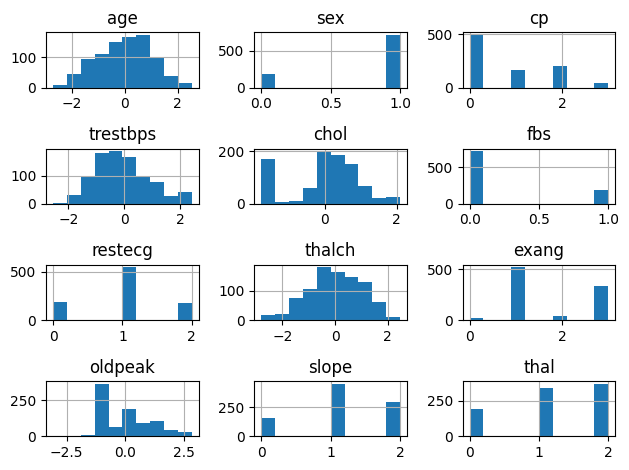

In [214]:
plt.figure(figsize=(15,10))
features.hist()
plt.tight_layout()
plt.show()

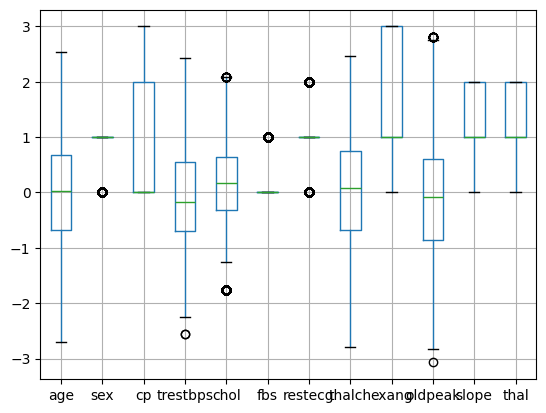

In [215]:
features.boxplot()
plt.show()

In [216]:
#since outliers are present
#we need to perform outlier capping for the features
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in features.select_dtypes(['int','float']).columns:
    outlier_capping(features,col)


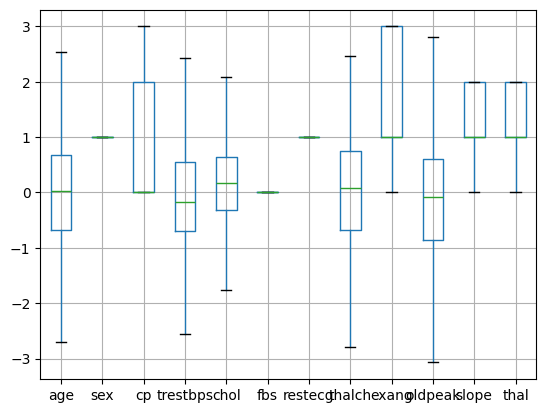

In [217]:
features.boxplot()
plt.show()

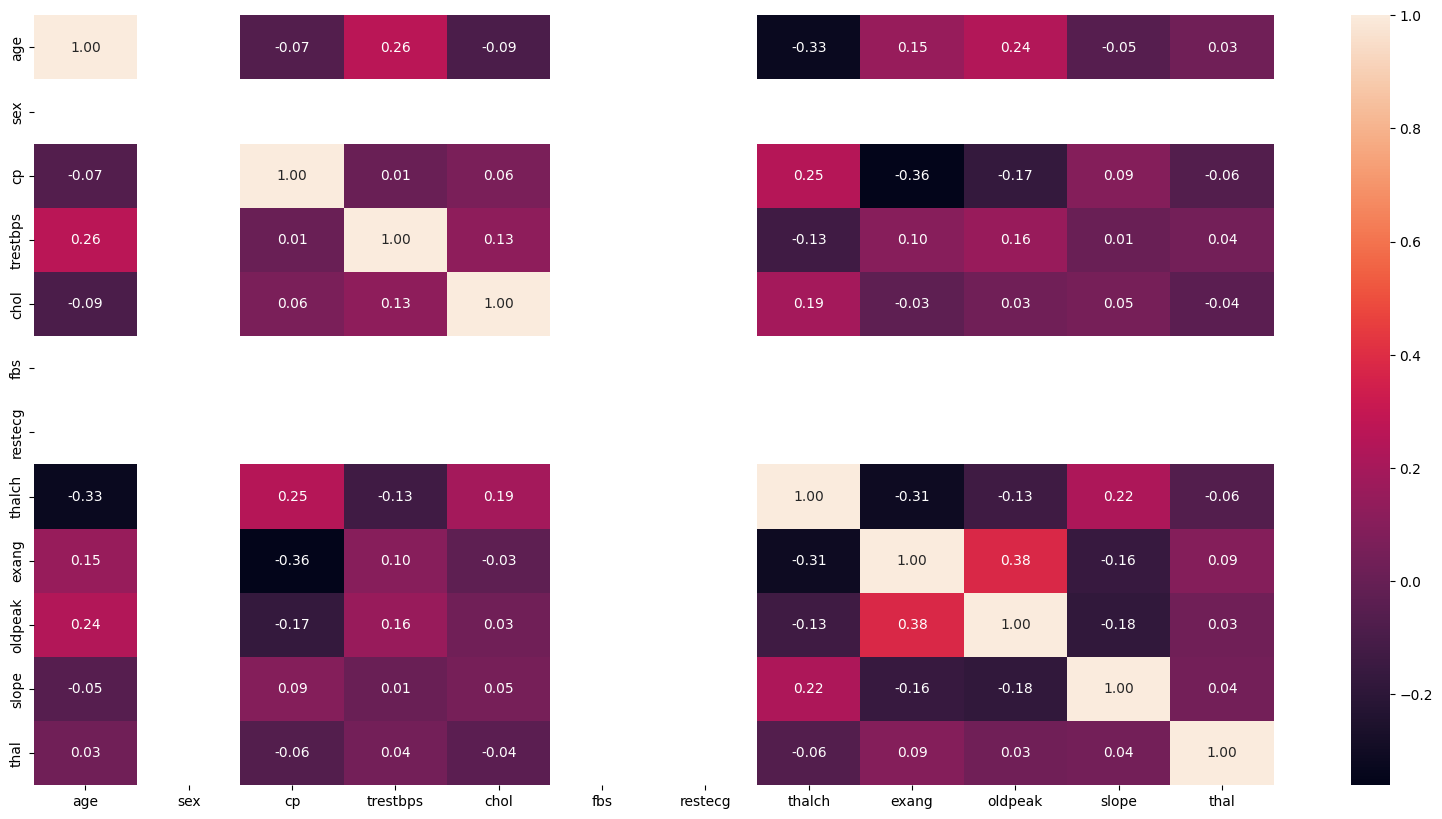

In [218]:
corr=features.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()

In [219]:
#mostly all the features have good correlation with every other feature.

In [220]:
#f_classification

In [221]:
from sklearn.feature_selection import f_classif

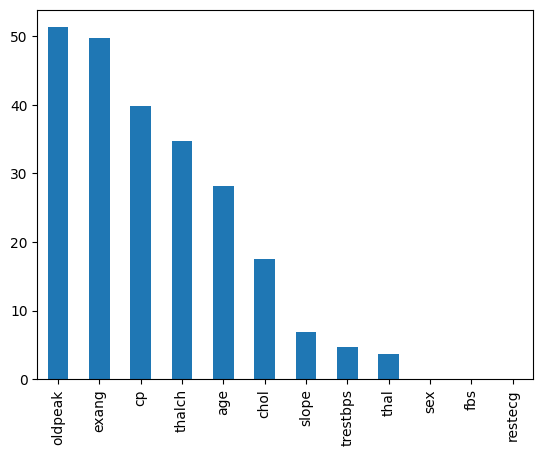

In [222]:
f_class=f_classif(features,target)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [223]:
features.drop(columns=['sex','fbs','restecg'],inplace=True)

In [224]:
features.head()

,age,cp,trestbps,chol,thalch,exang,oldpeak,slope,thal
0,1.006097,3.0,0.608289,0.265386,0.523305,1.0,1.389942,0.0,0.0
1,-1.396447,1.0,0.089952,-0.043590,-0.148458,1.0,-0.865396,1.0,0.0
2,0.350858,0.0,0.349120,-0.156881,0.448665,1.0,-0.473163,1.0,0.0
3,-0.195175,3.0,-0.791221,-0.218677,2.016110,1.0,-0.865396,1.0,0.0
4,0.350858,0.0,-1.205891,-0.064188,-0.372378,3.0,0.605477,1.0,0.0


In [225]:
#features haas been removed which has low correlation with target.

In [226]:
#decision tree

In [227]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 9)
(182, 9)
(725, 1)
(182, 1)


In [228]:
d_t=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5,min_samples_split=2)

In [229]:
d_t.fit(x_train,y_train)
y_pred=d_t.predict(x_test)
accuracy_score(y_test,y_pred)

0.5494505494505495

In [230]:
from sklearn.metrics import classification_report

In [231]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        80
           1       0.45      0.38      0.41        53
           2       0.42      0.23      0.29        22
           3       0.22      0.29      0.25        21
           4       0.50      0.17      0.25         6

    accuracy                           0.55       182
   macro avg       0.46      0.38      0.39       182
weighted avg       0.53      0.55      0.53       182



In [232]:
#hyper parameter tuning

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,7),'min_samples_split':[0,1,2,3,4,5]}

In [235]:
grid_search=GridSearchCV(estimator=d_t,param_grid=params,cv=5)

In [236]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 7),
                         'min_samples_split': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [237]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [238]:
grid_search.best_score_

np.float64(0.5531034482758621)

In [239]:
#model evaluation and analysis

In [240]:
d_t=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=2,splitter='random')

In [241]:
d_t.fit(x_train,y_train)
y_pred=d_t.predict(x_test)
accuracy_score(y_test,y_pred)

0.554945054945055

In [242]:
x_train.head()

,age,cp,trestbps,chol,thalch,exang,oldpeak,slope,thal
384,2.207368,2.0,2.422469,-1.760984,-0.148458,0.0,0.008550,1.0,2.0
150,-1.287240,2.0,-0.687554,0.337481,2.165391,1.0,-0.080931,0.0,2.0
616,0.460064,2.0,1.385795,0.038804,-1.641263,1.0,-0.865396,2.0,1.0
109,-0.195175,1.0,-0.687554,1.212914,1.344348,1.0,-0.669280,2.0,1.0
540,0.350858,0.0,0.867458,0.491969,-1.641263,3.0,2.076349,1.0,0.0


In [243]:
class_names_str = [str(x) for x in target.num.unique()]

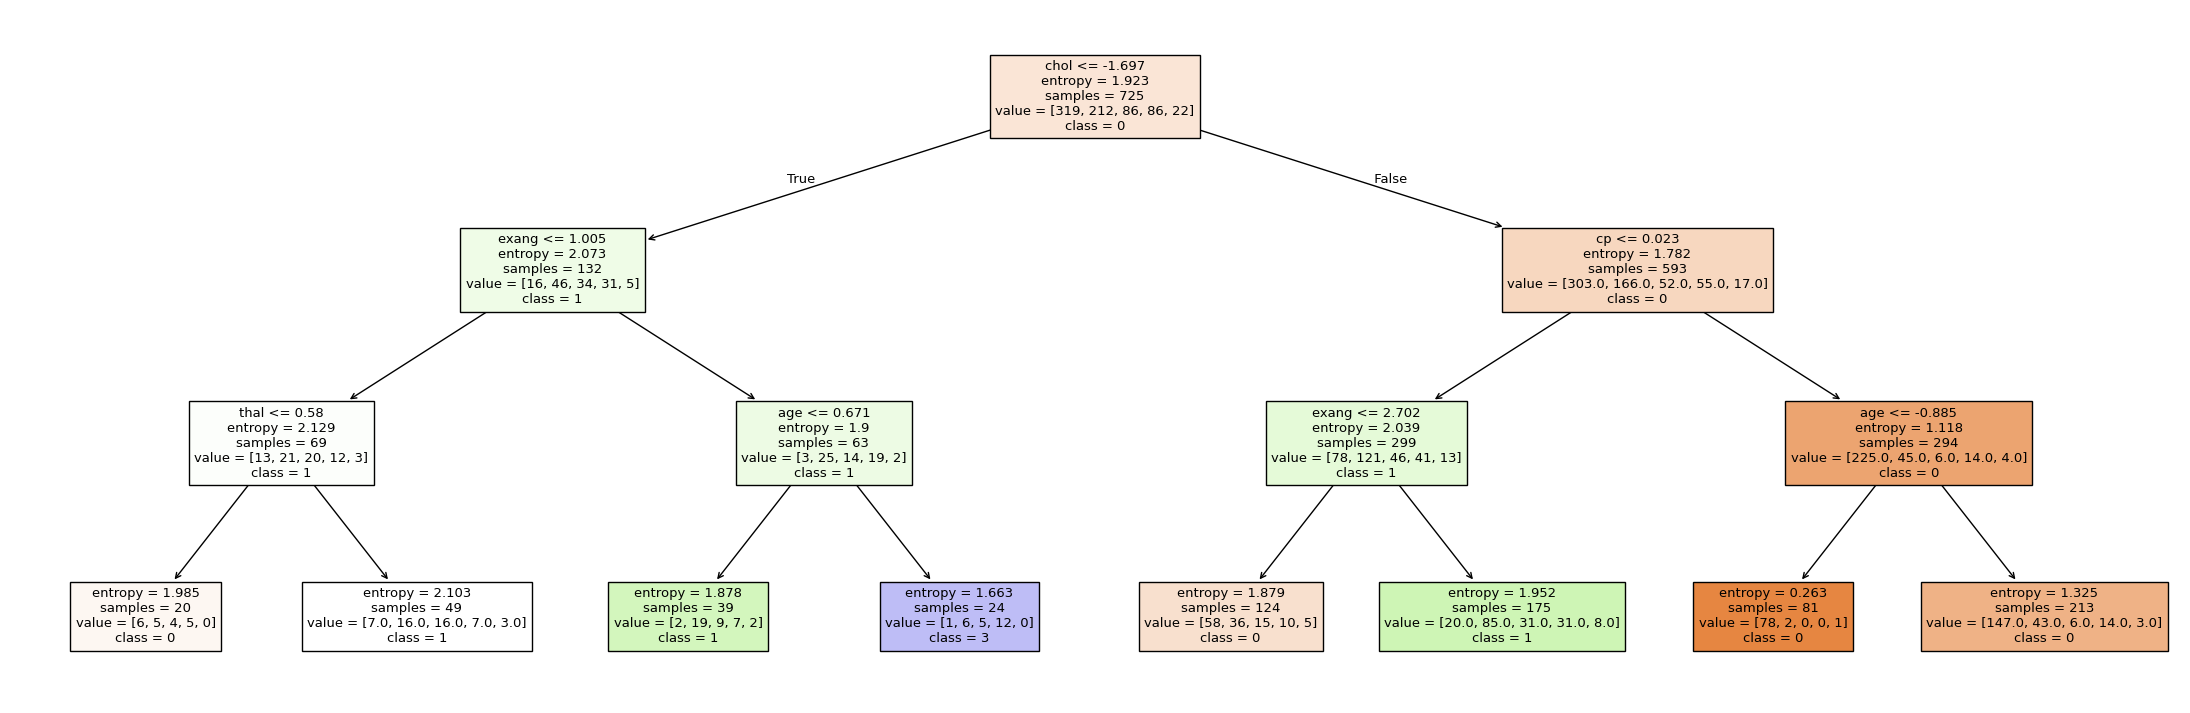

In [247]:
plt.figure(figsize=(28,9))
plot_tree(d_t,filled=True,feature_names=list(features.columns),class_names=class_names_str)
plt.show()

In [248]:
#interview questions

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
a.Some common hyperparameters of decision tree models are

1.criterion - measures split quality (gini or entropy)

2.max_depth - Limits tree depth, small -> underfit, large -> overfit

3.splitter - best or random split, affects accuracy

2. What is the difference between the Label encoding and One-hot encoding?

a.Label encoding converts each category into a unique order and is suitable for ordinal data.
One-hot encoding seperates binary columns for each category and is preferred for nominal data with no natural order, avoiding any misleading numeric relationship.